In [ ]:
import glob
import os
import re
from datetime import datetime

import h5py
import numpy as np
from PIL import Image
from tqdm import tqdm

import matplotlib.pyplot as plt

from ipywidgets import interact, Dropdown, IntText

from MirrorExtractor.mirror_extractor import MirrorExtractor

In [3]:
def get_dataset_info(h5_path):
    """Wyświetla informacje o datasecie."""
    with h5py.File(h5_path, 'r') as f:
        print(f"Dataset: {h5_path}")
        print(f"Utworzono: {f.attrs.get('created', 'N/A')}")
        print(f"Liczba luster: {f.attrs.get('num_mirrors', 'N/A')}")
        print("-" * 40)

        total_obs = 0
        for mirror_id in range(200):
            grp_path = f'mirrors/{mirror_id:03d}'
            if grp_path in f and 'images' in f[grp_path]:
                n = f[grp_path].attrs.get('num_observations', 0)
                total_obs += n

        print(f"Łączna liczba obserwacji: {total_obs}")

def scan_hdf5(path, recursive=True, tab_step=2):
    def scan_node(g, tabs=0):
        print(' ' * tabs, g.name)
        for k, v in g.items():
            if isinstance(v, h5py.Dataset):
                print(' ' * tabs + ' ' * tab_step + ' -', v.name)
            elif isinstance(v, h5py.Group) and recursive:
                scan_node(v, tabs=tabs + tab_step)
    with h5py.File(path, 'r') as f:
        scan_node(f)

In [53]:
BASE_DIR = "/home/pgliwny/Praca/Computer_vision_for_MAGIC/"
h5_output = os.path.join(BASE_DIR, "data/data/2025/mirrors_dataset_test2.h5")

In [54]:
get_dataset_info(h5_output)

Dataset: /home/pgliwny/Praca/Computer_vision_for_MAGIC/data/data/2025/mirrors_dataset_test2.h5
Utworzono: N/A
Liczba luster: N/A
----------------------------------------
Łączna liczba obserwacji: 1296


In [55]:
f = h5py.File(h5_output, 'r') 

In [56]:
Sapiński

<KeysViewHDF5 ['004', '005', '006', '007', '008', '009', '010', '011', '012', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066']>

In [32]:
f["mirrors/015"].keys()

<KeysViewHDF5 ['images', 'source_files']>

In [47]:
f["mirrors/015/source_files"][3]

b'IRCamM1T20251215_170547M.jpg'

In [ ]:
f.close()

In [57]:
img_9 = np.array(f["mirrors/009/images"])
img_9.shape

(27, 82, 99, 3)

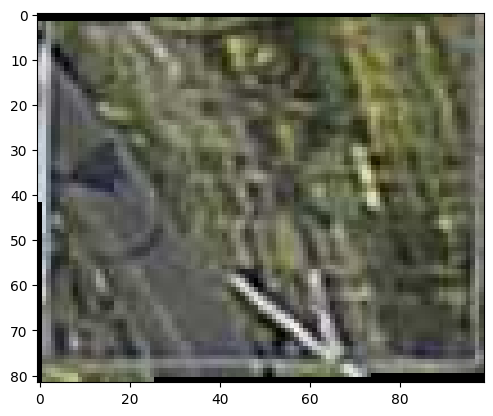

In [59]:
plt.imshow(img_9[1, :, :, :])

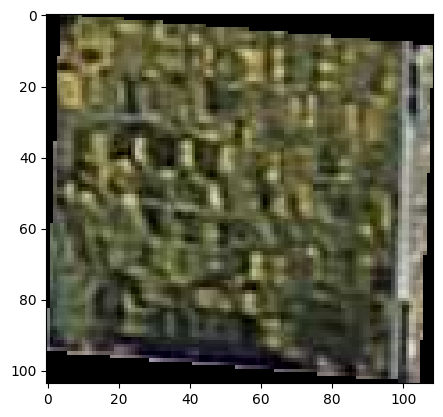

In [31]:
plt.imshow(img_150[2, :, :, :])

In [38]:
scan_hdf5(h5_output, 4)

 /
   /mirrors
     /mirrors/015
       - /mirrors/015/images
       - /mirrors/015/source_files
     /mirrors/150
       - /mirrors/150/images
       - /mirrors/150/source_files


In [61]:
def show_image(i):
    plt.figure()
    plt.imshow(img_9[i, :, :, :])
    plt.axis('off')
    plt.show()



In [62]:
# Create interactive dropdown
interact(
    show_image,
    i=Dropdown(
        options=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
        description='Select:'
    )
)

interactive(children=(Dropdown(description='Select:', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, …

<function __main__.show_image(i)>

In [31]:
BASE_DIR = "/home/pgliwny/Praca/Computer_vision_for_MAGIC/"

# Ścieżki
path_to_grid = os.path.join(BASE_DIR, "data/crossings_points.pkl")
#path_to_grid = os.path.join(BASE_DIR, "data/crossings_points_IRCamM1T20250702_161000M.pkl")
images_dir = os.path.join(BASE_DIR, "data/webcam_useful_image/webcam_useful_images/")
#images_dir = os.path.join(BASE_DIR, "data/data/2025/data_test")
h5_output = os.path.join(BASE_DIR, "data/data/2025/mirrors_dataset_test2.h5")

    # Inicjalizacja
extractor = MirrorExtractor(path_to_grid)
img_list = sorted(glob.glob(os.path.join(images_dir, "*05*.jpg")))

In [35]:
! ls /home/pgliwny/Praca/Computer_vision_for_MAGIC/data/data/2025/data_test

IRCamM1T20250705_091000M.jpg
IRCamM1T20250705_091000M.jpg:Zone.Identifier
IRCamM1T20250705_111000M.jpg
IRCamM1T20250705_111000M.jpg:Zone.Identifier
IRCamM1T20250705_141000M.jpg
IRCamM1T20250705_141000M.jpg:Zone.Identifier
IRCamM1T20251130_114000M.jpg
IRCamM1T20251130_114000M.jpg:Zone.Identifier
IRCamM1T20251130_134000M.jpg
IRCamM1T20251130_134000M.jpg:Zone.Identifier
IRCamM1T20251130_152000M.jpg
IRCamM1T20251130_152000M.jpg:Zone.Identifier
IRCamM1T20251130_164000M.jpg
IRCamM1T20251130_164000M.jpg:Zone.Identifier
IRCamM1T20251215_121547M.jpg
IRCamM1T20251215_121547M.jpg:Zone.Identifier
IRCamM1T20251215_135547M.jpg
IRCamM1T20251215_135547M.jpg:Zone.Identifier
IRCamM1T20251215_170547M.jpg
IRCamM1T20251215_170547M.jpg:Zone.Identifier
IRCamM1T20251217_121547M.jpg
IRCamM1T20251217_121547M.jpg:Zone.Identifier
IRCamM1T20251217_144547M.jpg
IRCamM1T20251217_144547M.jpg:Zone.Identifier
IRCamM1T20251217_170254M.jpg
IRCamM1T20251217_170254M.jpg:Zone.Identifier
IRCamM1T20251222_112503M.jpg
IRCamM1T2